# Data Wrangling on Umuzi Personality Scores.

## Overview of Notebook. 

*This notebook is about working with Personality scores data that was acquired from umuzi recruits.
*We are going to be merging data frames, filtering data frames and manipulation rows and columns in order to make the data useful.

### Import libraries that we shall use.

In [44]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Read in Personality scores csv file.

* Below we use pandas pd.read_csv method to read in the personality scores csv data into the notebook and assign the name per_scores to this data. 

In [45]:
per_scores = pd.read_csv("personality_scores.csv", delimiter=';')

* Below we use the .head() method to display the first (5) rows of the dataframe in order to have an idea of how our dataframe looks.

In [46]:
per_scores.head()

,ID,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,IPIP_HIGH_RISK
0,0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Examine the data frame for duplicates (based on ID), and drop any duplicates that exist. 

In [47]:
len(per_scores['ID'])-len(per_scores['ID'].drop_duplicates(keep='first'))

0

* Above we use the " len(per_scores['ID'])-len(per_scores['ID'].drop_duplicates(keep='first')) " to determine whether there are duplicate values to be dropped, we get a 0, meaning that there are no duplicate entries in the ID column that can be dropped.

In [48]:
per_scores['ID'].is_unique

True

In [49]:
per_scores.head(1)

,ID,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,IPIP_HIGH_RISK
0,0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Above we use "per_scores['ID'].is_unique" to further show that there are no duplicated entries in the personality scores dataframe when using the ID column.

### Assert that the new data frame is the length of the unique entries of the original data frame. 

* First we create the new dataframe which we shall call per_scores1 and set the ID colum as the index. 

In [50]:
per_scores1 = per_scores.set_index('ID')

* Below we use the .tail() method to see the last five row of the per_score1 dataframe.

In [51]:
per_scores1.tail()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,IPIP_HIGH_RISK
ID,,,,,,,,,,,,,,,,,,,,,
1550,"(3, 5)","(4, 5)","(3, 1)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1551,"(3, 3)","(4, 5)","(3, 5)","(5, 3)","(2, 5)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552,"(3, 5)","(4, 3)","(3, 5)","(5, 5)","(2, 5)","(5, 5)","(2, 3)","(2, 3)","(5, 5)","(1, 3)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1554,"(3, 3)","(4, 5)","(3, 1)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 5)","(5, 3)","(1, 3)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Below we check out the shapes of per_scores and per_scores1 dataframe to compare them.

In [52]:
print(per_scores.shape)
print(per_scores1.shape)

(1555, 70)
(1555, 69)


* from the abouve output, we can tell that both dataframes have equal number of rows (1555) and per_score has has 70 columns while per_scores1 has 69 because we made the ID column the new index column.

In [53]:
#Use len to get the number of rows of per_scores
print(len(per_scores))
#Use len to get the number of rows of per_scores1
print(len(per_scores1))

1555
1555


### 2. Write functions that will (1) convert the answer on each of the personality test questions to a number, as set out in scoring.md, and (2) calculate total scores for each of the subscales (conscientiousness, emotional stability, openness to new experience, agreeableness, extraversion).  

* Below we create per_scores2 df and drop all NaN values.

In [54]:
per_scores2 = per_scores1.dropna(axis = 1)

* Below we use the .head() method to display the first (5) rows of the dataframe in order to have an idea of how our per_scores dataframe looks.

In [55]:
per_scores2.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I often forget to put things back in their proper place],Section 5 of 6 [I pay attention to details.],Section 5 of 6 [I seldom feel blue (down).],Section 5 of 6 [I spend time reflecting on things.],Section 5 of 6 [I start conversations.],Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.]
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 5)","(4, 3)","(5, 5)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 1)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 3)"
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 1)","(5, 3)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,"(3, 1)","(3, 5)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 1)"
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 5)","(5, 5)","(1, 3)","(2, 3)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"


In [56]:
per_scores2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 0 to 1554
Data columns (total 50 columns):
Section 5 of 6 [I am always prepared.]                                      1555 non-null object
Section 5 of 6 [I am easily disturbed.]                                     1555 non-null object
Section 5 of 6 [I am exacting (demanding) in my work.]                      1555 non-null object
Section 5 of 6 [I am full of ideas.]                                        1555 non-null object
Section 5 of 6 [I am interested in people.]                                 1555 non-null object
Section 5 of 6 [I am not interested in abstract ideas.]                     1555 non-null object
Section 5 of 6 [I am not interested in other people's problems.]            1555 non-null object
Section 5 of 6 [I am not really interested in others.]                      1555 non-null object
Section 5 of 6 [I am quick to understand things.]                           1555 non-null object
Section 5 of 6 [I am

* Above we used the .info() method to get information about our dataframe. we can see that our dataframe contains objects.

* Below we check for the type in row 3 of the per_scores1 dataframe.

In [57]:
print(per_scores2.iloc[3].dtype)

object


* The eval() method parses the expression passed to this method and runs python expression (code) within the program. We use the eval() method on the dataframe to convert the values to tuples.

* Below we define the function Total_for_Subscale to let us calculate the subscale sum.

In [58]:
def total_for_subscale(per_scores_per_person, subscale):
    subscale_sum = sum([eval(per_scores_per_person[i])[1] for i in range(50) if eval(per_scores_per_person[i])[0] == subscale])
    return(subscale_sum)

per_scores2['Extraversion'] = per_scores2.apply(lambda row: total_for_subscale(row, 1), axis=1)
per_scores2['Agreeableness'] = per_scores2.apply(lambda row: total_for_subscale(row, 2), axis=1)
per_scores2['Conscientiousness'] = per_scores2.apply(lambda row: total_for_subscale(row, 3), axis=1)
per_scores2['Neuroticism'] = per_scores2.apply(lambda row: total_for_subscale(row, 4), axis=1)
per_scores2['Intellect'] = per_scores2.apply(lambda row: total_for_subscale(row, 5), axis=1)

* we use .head() to check the new columns in the per_scores2 dataframe.

In [59]:
per_scores2.head(5)

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.],Extraversion,Agreeableness,Conscientiousness,Neuroticism,Intellect
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,"(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)",30,40,48,36,42
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,"(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 3)",42,46,46,40,42
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,"(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)",28,40,40,38,42
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,"(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 1)",30,38,38,40,38
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,"(2, 3)","(2, 5)","(1, 3)","(5, 1)","(4, 3)",28,34,46,38,36


## 3. Create a function/functions that takes in subscale total, and for each subscale, creates a new column called "{subscale_name}interpretation" (e.g., conscientiousnessinterpretation) and applies the labels "low", "medium", or "high" according to a person's score on that subscale. 

* Create a new dataframe from the per_scores2 dataframe containing just the Extraversion, Agreeableness, Conscientiousness, Neuroticism, and Intellect columns and name it subscale_scores.

In [60]:
subscale_scores = per_scores2[["Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Intellect"]]

* We take a look at the new dataframe.

In [61]:
subscale_scores.head()

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Intellect
ID,,,,,
0,30,40,48,36,42
1,42,46,46,40,42
2,28,40,40,38,42
3,30,38,38,40,38
4,28,34,46,38,36


In [62]:
subscale_scores.describe()

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Intellect
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,30.852733,42.180064,42.149196,36.118328,40.086174
std,8.076902,5.346042,5.924742,7.025337,5.469963
min,10.000000,22.000000,16.000000,12.000000,20.000000
25%,26.000000,38.000000,38.000000,32.000000,36.000000
50%,30.000000,42.000000,44.000000,38.000000,40.000000
75%,36.000000,46.000000,46.000000,42.000000,44.000000
max,50.000000,50.000000,50.000000,50.000000,50.000000


In [63]:
subscale_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 0 to 1554
Data columns (total 5 columns):
Extraversion         1555 non-null int64
Agreeableness        1555 non-null int64
Conscientiousness    1555 non-null int64
Neuroticism          1555 non-null int64
Intellect            1555 non-null int64
dtypes: int64(5)
memory usage: 72.9 KB


In [64]:
import statistics

* Below we use .loc to select the entire dataframe and .mean() and .std() methods to calculate the mean and standard deviation of the dataframe columns.

In [65]:
subscale_scores.loc[ : , : ].mean()

Extraversion         30.852733
Agreeableness        42.180064
Conscientiousness    42.149196
Neuroticism          36.118328
Intellect            40.086174
dtype: float64

In [66]:
subscale_scores.loc[ : , : ].std()

Extraversion         8.076902
Agreeableness        5.346042
Conscientiousness    5.924742
Neuroticism          7.025337
Intellect            5.469963
dtype: float64

Below we define a Score_interpretation function to help us calculate the interpreted scores.

In [67]:
def generate_score_interpretation(score):
# categories = ['low', 'medium', 'high']
# defining function to set the categories
    for columns in subscale_scores.columns:
        # we use the mean and std calculations from above to get the High and Low variables.
        high = subscale_scores.loc[:, columns].mean() + ((subscale_scores.loc[:, columns].std()) / 2)
        low = subscale_scores.loc[:, columns].mean() - ((subscale_scores.loc[:, columns].std()) / 2)
        
        if score < low: 
            return 'low' 

        elif score >= low and score < high: 
            return 'medium'
        
        else :
            return 'high'

subscale_scores[['Extraversion_Interpretation','Agreeableness_Interpretation','Conscientiousness_Interpretation', 'Neuroticism_Interpretation','Openness_Interpretation']] = subscale_scores.applymap(generate_score_interpretation)
subscale_scores.head()

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Intellect,Extraversion_Interpretation,Agreeableness_Interpretation,Conscientiousness_Interpretation,Neuroticism_Interpretation,Openness_Interpretation
ID,,,,,,,,,,
0,30,40,48,36,42,medium,high,high,high,high
1,42,46,46,40,42,high,high,high,high,high
2,28,40,40,38,42,medium,high,high,high,high
3,30,38,38,40,38,medium,high,high,high,high
4,28,34,46,38,36,medium,medium,high,high,high


* Now we apply the scores_interpretation function to subscale scores and create new columns 

### Read in the data in departments.csv and merge this data frame with the personality score data frame.

* Use pandas to read in the departments.csv file and call this file departments.

In [68]:
departments = pd.read_csv("departments.csv", delimiter = ";")

* Again we use the .head() method to see what our dataframe looks like.

In [69]:
departments.head()

,ID,Department,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,IPIP_HIGH_RISK
0,0,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We use the .info() method to see what is our info made of.

In [70]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 21 columns):
ID                1555 non-null int64
Department        1555 non-null object
Unnamed: 2        0 non-null float64
Unnamed: 3        0 non-null float64
Unnamed: 4        0 non-null float64
Unnamed: 5        0 non-null float64
Unnamed: 6        0 non-null float64
Unnamed: 7        0 non-null float64
Unnamed: 8        0 non-null float64
Unnamed: 9        0 non-null float64
Unnamed: 10       0 non-null float64
Unnamed: 11       0 non-null float64
Unnamed: 12       0 non-null float64
Unnamed: 13       0 non-null float64
Unnamed: 14       0 non-null float64
Unnamed: 15       0 non-null float64
Unnamed: 16       0 non-null float64
Unnamed: 17       0 non-null float64
Unnamed: 18       0 non-null float64
Unnamed: 19       0 non-null float64
IPIP_HIGH_RISK    0 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 255.2+ KB


* Create a new dataframe and call it depts. This dataframe will only contain the non-null value containing columns as shown by the above output.

In [71]:
depts = departments[["ID", "Department"]]

In [72]:
depts.head()

,ID,Department
0,0,Data
1,1,Data
2,2,Data
3,3,Data
4,4,Data


* Now we will merge the depts df and the subscale df, thus creating a merged_df from the two. We shallalso set the ID column from the depts df as the index for the new dataframe.

In [73]:
merged_df = pd.concat([depts, subscale_scores], 1)

In [74]:
merged_df.set_index('ID')
merged_df.head()

,ID,Department,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Intellect,Extraversion_Interpretation,Agreeableness_Interpretation,Conscientiousness_Interpretation,Neuroticism_Interpretation,Openness_Interpretation
0,0,Data,30,40,48,36,42,medium,high,high,high,high
1,1,Data,42,46,46,40,42,high,high,high,high,high
2,2,Data,28,40,40,38,42,medium,high,high,high,high
3,3,Data,30,38,38,40,38,medium,high,high,high,high
4,4,Data,28,34,46,38,36,medium,medium,high,high,high


### Assert that the newly created merged data frame has the same amount of rows as the department data frame, and the expected number of columns. 

* Below we use print(_____.shape) on the departments and the merged_df dataframes to check the number of rows and columns they each have.

In [75]:
print(departments.shape)
print(merged_df.shape)

(1555, 21)
(1555, 12)


### 5. Create histograms of personality scores by department. You may need to clean some of the department names.  

Before we plot any charts, lets do a value count on the merged_df column Department to see how many points we have to plot.

In [76]:
merged_df['Department'].value_counts()

Strategy       449
Data           329
Copywriting    326
Web Dev        170
Web dev        161
Design         120
Name: Department, dtype: int64

From the above output, we can see that there is "Web Dev" and "Web dev", this will result in creating an error in our visualizations. 

Lets fix this by renaming "Web dev" to "Web Dev". Then lets perform another value count to see how the the Web Dev count has changed.

In [77]:
merged_df = merged_df.replace('Web dev', 'Web Dev')
merged_df['Department'].value_counts()

Strategy       449
Web Dev        331
Data           329
Copywriting    326
Design         120
Name: Department, dtype: int64

Create histograms of personality scores by department.

For this we first use the .groupby method to group our values accordingly.

In [78]:
merged_df.groupby(['Department']).groups.keys()

dict_keys(['Copywriting', 'Data', 'Design', 'Strategy', 'Web Dev'])

Below we create histgram subplots according to the department.

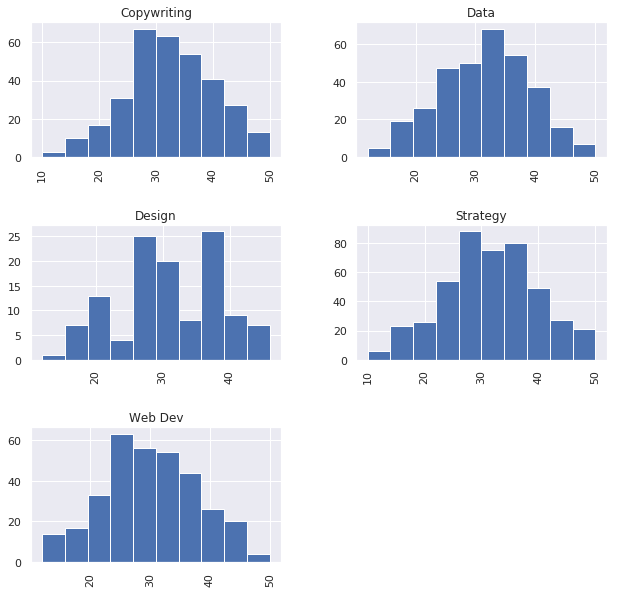

In [79]:
merged_df["Extraversion"].hist(by=merged_df['Department'], figsize = (10,10))
labels = "Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Intellect"

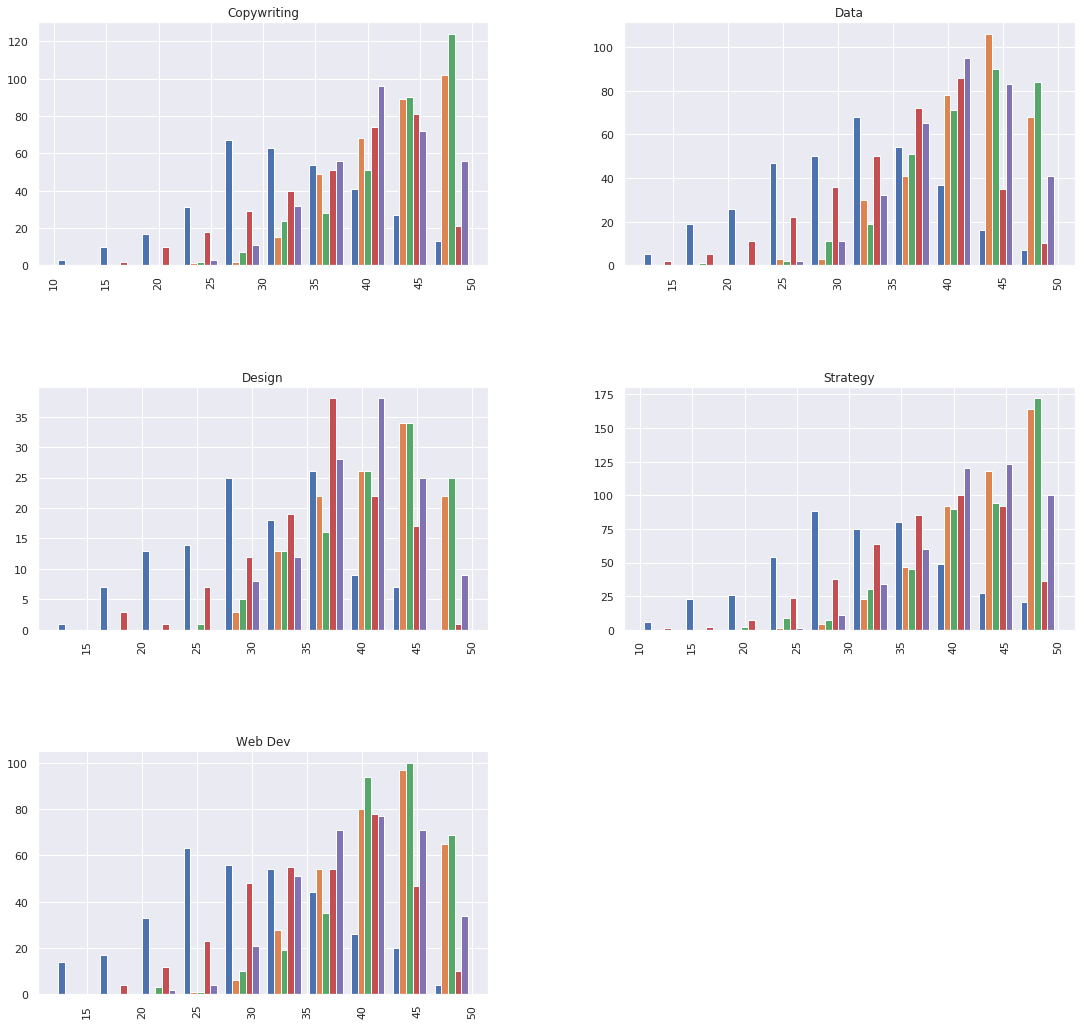

In [166]:
labels = "Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Intellect"
merged_df[["Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Intellect"]].hist(by=merged_df['Department'], label=labels, figsize = (18,18))
plt.legend(labels)
plt.show()

### 6. Filter the merged data frame so that you get only the ID numbers of applicants who score "low" on emotional stability, conscientiousness or agreeableness. 

First lets take a look at the data using merged_df.head() method.

In [107]:
merged_df.head()

,ID,Department,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Intellect,Extraversion_Interpretation,Agreeableness_Interpretation,Conscientiousness_Interpretation,Neuroticism_Interpretation,Openness_Interpretation
0,0,Data,30,40,48,36,42,medium,high,high,high,high
1,1,Data,42,46,46,40,42,high,high,high,high,high
2,2,Data,28,40,40,38,42,medium,high,high,high,high
3,3,Data,30,38,38,40,38,medium,high,high,high,high
4,4,Data,28,34,46,38,36,medium,medium,high,high,high


* Display the ID's of all those who scored Low on Neuroticism_Interpretation

In [125]:
low_Neuroticism_Interpretation_df = merged_df.loc[merged_df['Neuroticism_Interpretation'] =='low']
low_Neuroticism_Interpretation_df['ID']

9          9
11        11
12        12
14        14
18        18
19        19
27        27
40        40
42        42
60        60
82        82
84        84
85        85
91        91
98        98
106      106
114      114
120      120
125      125
165      165
169      169
178      178
213      213
221      221
229      229
231      231
234      234
239      239
240      240
265      265
        ... 
1364    1364
1369    1369
1371    1371
1376    1376
1385    1385
1386    1386
1395    1395
1398    1398
1399    1399
1401    1401
1407    1407
1423    1423
1427    1427
1433    1433
1438    1438
1440    1440
1462    1462
1463    1463
1470    1470
1472    1472
1483    1483
1488    1488
1493    1493
1495    1495
1496    1496
1513    1513
1520    1520
1522    1522
1531    1531
1548    1548
Name: ID, Length: 185, dtype: int64

* Display the ID's of all those who scored Low on Agreeableness_Interpretation

In [123]:
low_Agreeableness_Interpretation_df = merged_df.loc[merged_df['Agreeableness_Interpretation'] =='low']
low_Agreeableness_Interpretation_df['ID']

25        25
85        85
546      546
716      716
801      801
971      971
1085    1085
1197    1197
Name: ID, dtype: int64

* Display the ID's of all those who scored Low on Conscientiousness_Interpretation

In [128]:
low_Conscientiousness_Interpretation_df = merged_df.loc[merged_df['Conscientiousness_Interpretation'] =='low']
low_Conscientiousness_Interpretation_df['ID']

34        34
129      129
132      132
286      286
405      405
523      523
526      526
528      528
584      584
590      590
663      663
686      686
716      716
721      721
732      732
736      736
746      746
801      801
881      881
889      889
960      960
1109    1109
1143    1143
1154    1154
1197    1197
1236    1236
1326    1326
1516    1516
Name: ID, dtype: int64

In [151]:
low_df = pd.concat([low_Neuroticism_Interpretation_df, low_Agreeableness_Interpretation_df, low_Conscientiousness_Interpretation_df], axis =1)  

In [152]:
low_df.head()

,ID,Department,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Intellect,Extraversion_Interpretation,Agreeableness_Interpretation,Conscientiousness_Interpretation,...,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Intellect,Extraversion_Interpretation,Agreeableness_Interpretation,Conscientiousness_Interpretation,Neuroticism_Interpretation,Openness_Interpretation
9,9.0,Data,32.0,44.0,36.0,18.0,42.0,medium,high,high,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11.0,Data,24.0,36.0,48.0,20.0,46.0,low,high,high,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12.0,Data,36.0,46.0,36.0,20.0,38.0,high,high,high,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14.0,Data,24.0,40.0,42.0,18.0,36.0,low,high,high,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18.0,Data,24.0,40.0,36.0,14.0,44.0,low,high,high,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Print the ID numbers and departments of these applicants to the screen, and also assign these applicants the tag "high_risk" in a new column.